# What is machine learning?
**The art and science of:**


* Giving computers the ability to learn to make decisions from data
*  … without being explicitly programmed!


**Examples:**

* Learning to predict whether an email is spam or not
* Clustering wikipedia entries into different categories
* Supervised learning: Uses labeled data
* Unsupervised learning: Uses unlabeled data



---



---



---



**Naming conventions for supervised learning**

* Features = predictor variables 
* Target variable = dependent variable = response variable

**Tools:**

We will use scikit-learn/sklearn: 



---



---



---



The [Iris dataset:](https://archive.ics.uci.edu/ml/datasets/iris)

**Features:** Petal length-Petal width-Sepal length-Sepal width

**Target variable:** Species: Versicolor-Virginica-Setosa

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris = datasets.load_iris()
print(type(iris))
print(iris.keys())


<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
print(type(iris.data))
print(iris.data.shape)

<class 'numpy.ndarray'>
(150, 4)


In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
#We pass from numpy arrays to dataframes, more convenient (visualisation, plots, etc)

X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Scatter matrix:**

A scatter matrix (pairs plot) compactly plots all the numeric variables we have in a dataset against each other one. In Python, this data visualization technique can be carried out with many libraries but if we are using Pandas to load the data, we can use the base scatter_matrix method to visualize the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5707d5ee90>,
      dtype=object)

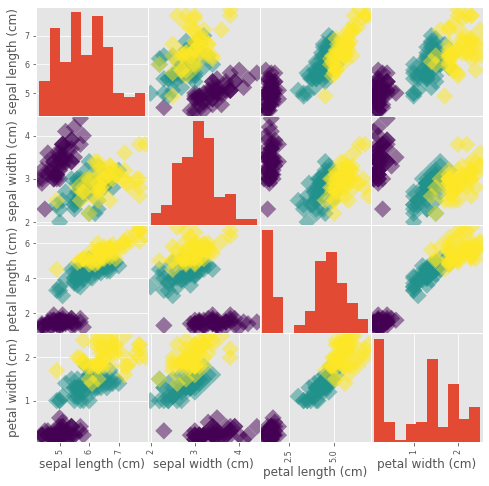

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, c = y, figsize = [8, 8], s=150, marker = 'D')

# The classification challenge

**k-Nearest Neighbors**

Basic idea: Predict the label of a data point by looking at the k closest labeled data points and taking a majority vote

![](https://drive.google.com/uc?export=view&id=1kTN_E1AqVYNvRA7tIifA8k8HdG03w9TN)

![](https://drive.google.com/uc?export=view&id=1k3m1sbxh0SGu8om4kmXhkCVyeTQKPk5M)


**Scikit-learn fit and predict**

All machine learning models implemented as Python classes


* They implement the algorithms for learning and predicting
* Store the information learned from the data
* Training a model on the data = fitting a model to the data with the .fit() method
* To predict the labels of new data: .predict() method

**Using scikit-learn to fit a classifier**

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])
#KNeighborsClassifier(algorithm='auto', leaf_size=30,metric='minkowski',metric_params=None, n_jobs=1,n_neighbors=6, p=2,weights='uniform')
print(iris['data'].shape)
print(iris['target'].shape)


(150, 4)
(150,)


**Predicting on unlabeled data**

In [ ]:
#a random test to show how it works
X_new=np.random.randn(1,4)
print(X_new.shape)
prediction = knn.predict(X_new)
X_new.shape
print('Prediction {}'.format(prediction))


(1, 4)
Prediction [0]


<font color='blue'> A good point: all learning algorithms are parallelized and can run on many inputs simultaneously!</font> 

In [7]:
X_new=np.random.randn(20,4)
print(X_new.shape)
prediction = knn.predict(X_new)
X_new.shape
print('Prediction {}'.format(prediction))


(20, 4)
Prediction [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Measuring model performance**
* In classification, accuracy is a commonly used metric
* Accuracy = Fraction of correct predictions
* Which data should be used to compute accuracy?
* How well will the model perform on new data?

**Classical learning process:**

Split data into training and test set:

* Fit/train the classifier on the training set
* Make predictions on test set
* Compare predictions with the known labels

In [ ]:
X=iris.data
y=iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print(knn.score(X_test, y_test)) #95 accuracy!

Test set predictions:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]
0.9555555555555556


**Overfitting and underfitting:**


* Overfitting: (surapprentissage) un modèle trop spécialisé sur les données du Training Set et qui se généralisera mal.

* Underfitting: (sous-apprentissage) le modèle prédictif généré lors de la phase d'apprentissage, s'adapte mal au Training Set.



<font color='orange'>Le meilleur modèle est celui du juste milieu </font>  


![](https://drive.google.com/uc?export=view&id=1oBFhduckw0h-bbU44fvweT53nnlJjp5F)

**The relation between model complexity-overfitting-underfitting:**

![](https://drive.google.com/uc?export=view&id=1OCneZyyp_eyctt5jTgw3oZieIxjCYhIs)